In [1]:
import networkx as nx
import random

In [2]:
def newEdgesGenerator(G, w, node, seed):
    clique = False
    while clique == False:
        toConnect = []
        ne = 0
        while ne < w:
            nc = random.randint(0,node-1)
            if nc not in toConnect:
                toConnect.append(nc)
                ne = ne + 1
        for nn in toConnect:
            G.add_edge(node,nn)
        toConnect.append(node)
        H = G.subgraph(toConnect)
        n = len(toConnect)
        if H.size() == n*(n-1)/2:
            clique = True
        else:
            toConnect.pop()
            for el in toConnect:
                G.remove_edge(node, el)
    
    return G

In [3]:
def graphGenerator(w, n, c, seed):
    G = nx.complete_graph(w+1)
    toRemove = int(G.number_of_edges()*c/10)
    edgeList = edges = list(G.edges())
    for num in range(0,1):
        idx = random.randint(0,len(G.edges())-1)
        G.remove_edge(edgeList[idx][0], edgeList[idx][1])
    for node in range(w+1,n):
        G.add_node(node)
        G = newEdgesGenerator(G, w, node, seed)
    nx.draw(G, with_labels = True)
    
    return G

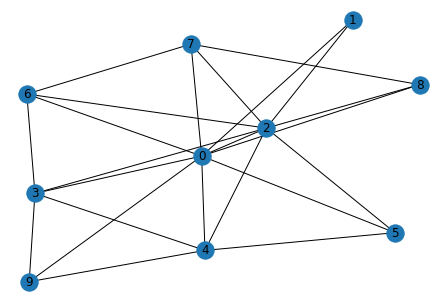

In [4]:
graphGenerator(3,10,4,34)

In [5]:
def wcspGenerator(w, n, c, m, d, t, seed):
    G = graphGenerator(w, n, c, seed)
    f = open("wcsp_"+str(w)+"_"+str(n)+"_"+str(m)+".wcsp", "w")
    f.write("wcsp "+str(n)+" "+str(m)+" "+str(G.number_of_edges())+" "+str(t)+"\n")
    for v in range(0, n):
        f.write(str(m)+" ")
    f.write("\n")
    tuples = [range(0, m*m, 1)]
    for edge in G.edges():
        f.write("2 "+str(edge[0])+" "+str(edge[1])+" 0 "+str(m*m)+"\n")
        k = int(m*m*d/10)
        selected = random.sample(tuples, k)
        m1 = 0
        m2 = 0
        for tup in tuples:
            if tup in selected:
                cost = random.randint(1,t)
                f.write(str(m1)+" "+str(m2)+" "+str(cost)+"\n")
        m1 = m1 + 1
        m2 = m2 + 2
                
    f.close()

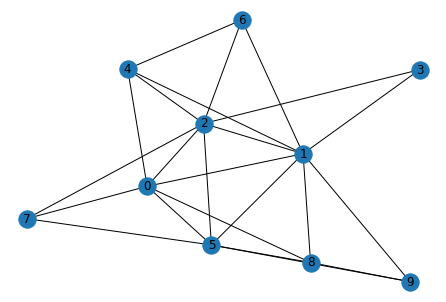

In [6]:
#w,n,c,m,d,t,seed

wcspGenerator(3,10,4,2,3,15,34)